In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atividades Diárias

Esta fonte de dados nos da informações diárias sobre as atividades dos usuários da FitBit.

In [3]:
atividade_diaria = pd.read_csv('dailyActivity_merged.csv')
atividade_diaria.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


#### Informações sobre a base de atividade diária.

É importante ressaltarmos que a distância não tem a indicação da medida. Ou seja, não temos como definir se estão em metros, km ou milhas, o que pode atrapalhar um pouco na análise. Além disso precisamos destacar que a segregação que ocorre na base é separada pelo MET, um sistema que mede o trabalho metabólico do seu corpo com o de descanso. Assim a segregação ocorre de acordo com o valor do MET, que para cada uma das categorias ficam:

* Sedentary: 0 - 1,5
* Light Active: 1,5 - 3,0
* Farily Active: 3,0 - 6,0
* Very Active: 6,0 acima 

In [4]:
display(atividade_diaria.describe())

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [5]:
atividade_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Temos então 940 observações que compõem 15 diferentes colunas. Nenhum valor nulo foi encontrado, um indício bom que a base foi preenchida corretamente. Precisamos alterar o tipo da coluna ACtivityDate para o formato de data. Pode ser útil para a análise ter o nome dos dias da semana também para ver se há alguma tendência entre os dias.

In [6]:
#Conversão para datetime
atividade_diaria['ActivityDate'] = pd.to_datetime(atividade_diaria['ActivityDate']) 
#Transformando a informação da data referente a cada dia da semana das observações
dia_da_semana = atividade_diaria['ActivityDate'].dt.strftime('%A')
atividade_diaria.insert(2, 'Dia_semana', dia_da_semana)


Agora iremos verificar a quantidade de usuários diferentes que estão na base de dados. Além disso temos que verificar se as informações estão com valores que fazem sentido. Por exemplo, se o número de passos for muito pequeno podemos ter duas opções nestes casos: Ou não foi detectado passos por conta de um problema. Ou então aquela pessoa realmente realizou poucos passos(Neste podemos pensar que uma pessoa foi internada e por isso não caminha muito)

In [7]:
#Contando a quantidade de usuários únicos
atividade_diaria['Id'].nunique()

33

In [8]:
#Verificaremos primeiro a quantidade de observações que possuem a quantidade de passos zerada.
passos_zerados = atividade_diaria.loc[atividade_diaria['TotalSteps'] == 0]
len(passos_zerados['TotalSteps'])

77

Para uma análise da distribuição da quantidade de passos analisaremos diferentes quartis da amostra. Com isso podemos entender como se da a distribuição da quantidade de passos relatadas nas observações e quando estas estão em um valor muito baixo excluirmos para não viesar nosso código.

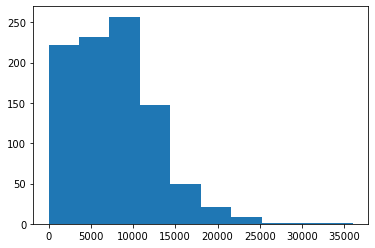

Quartil 5%:  0.0
Quartil 7%:  0.0
Quartil 9%:  43.01999999999998
Quartil 10%:  253.00000000000006


In [9]:
plt.hist(atividade_diaria['TotalSteps'])
plt.show()
print('Quartil 5%: ', np.quantile(atividade_diaria['TotalSteps'], 0.05))
print('Quartil 7%: ', np.quantile(atividade_diaria['TotalSteps'], 0.07))
print('Quartil 9%: ', np.quantile(atividade_diaria['TotalSteps'], 0.09))
print('Quartil 10%: ', np.quantile(atividade_diaria['TotalSteps'], 0.10))

Com esta análise podemos descartar então os valores que iriam viesar nossa análise. Uma quantidade de 43 passos é muito baixa quando pensamos no dia total da pessoa. Iremos excluir então da nossa análise todas as observações que tiveram uma quantidade de passos registrada menor que 253, referente ao percentil de 10% da nossa amostra.

In [10]:
poucos_passos = atividade_diaria.loc[atividade_diaria['TotalSteps'] < 253]
atv_dia = atividade_diaria.loc[atividade_diaria['TotalSteps'] >= 253]

In [11]:
atv_dia.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.460000e+02,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,4.875181e+09,8484.794326,6.098475,6.082530,0.120190,1.669645,0.630603,3.710887,0.001785,23.477541,15.072104,214.125296,949.763593,2377.117021
std,2.415593e+09,4645.114803,3.661338,3.643348,0.652359,2.752698,0.909808,1.804518,0.007723,33.822563,20.523002,93.254685,272.190572,696.653386
min,1.503960e+09,254.000000,0.160000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,52.000000
25%,2.320127e+09,5036.000000,3.480000,3.480000,0.000000,0.000000,0.000000,2.402500,0.000000,0.000000,0.000000,150.000000,720.250000,1870.750000
50%,4.558610e+09,8165.500000,5.690000,5.690000,0.000000,0.455000,0.320000,3.645000,0.000000,8.000000,8.000000,212.000000,1017.500000,2227.000000
75%,6.962181e+09,11138.750000,8.017500,7.950000,0.000000,2.307500,0.877500,4.917500,0.000000,36.000000,21.000000,273.000000,1182.000000,2845.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


Interessante notar que o Logged Activities Distance possui até o quartil 75% o valor de 0. Ou seja, uma indicação que os usuários preferem que as atividades sejam notadas automaticamente, poucos realmente ativam as atividades quando irão realizar uma atividade física. Por isso iremos excluir essa coluna pois ela pode viesar nossa análise.

In [12]:
atv_dia = atv_dia.drop('LoggedActivitiesDistance', axis=1)

Iremos agrupar o nosso dataframe por ID e tirar a média das outras variáveis que podem nos dar algumas informações interessantes. 

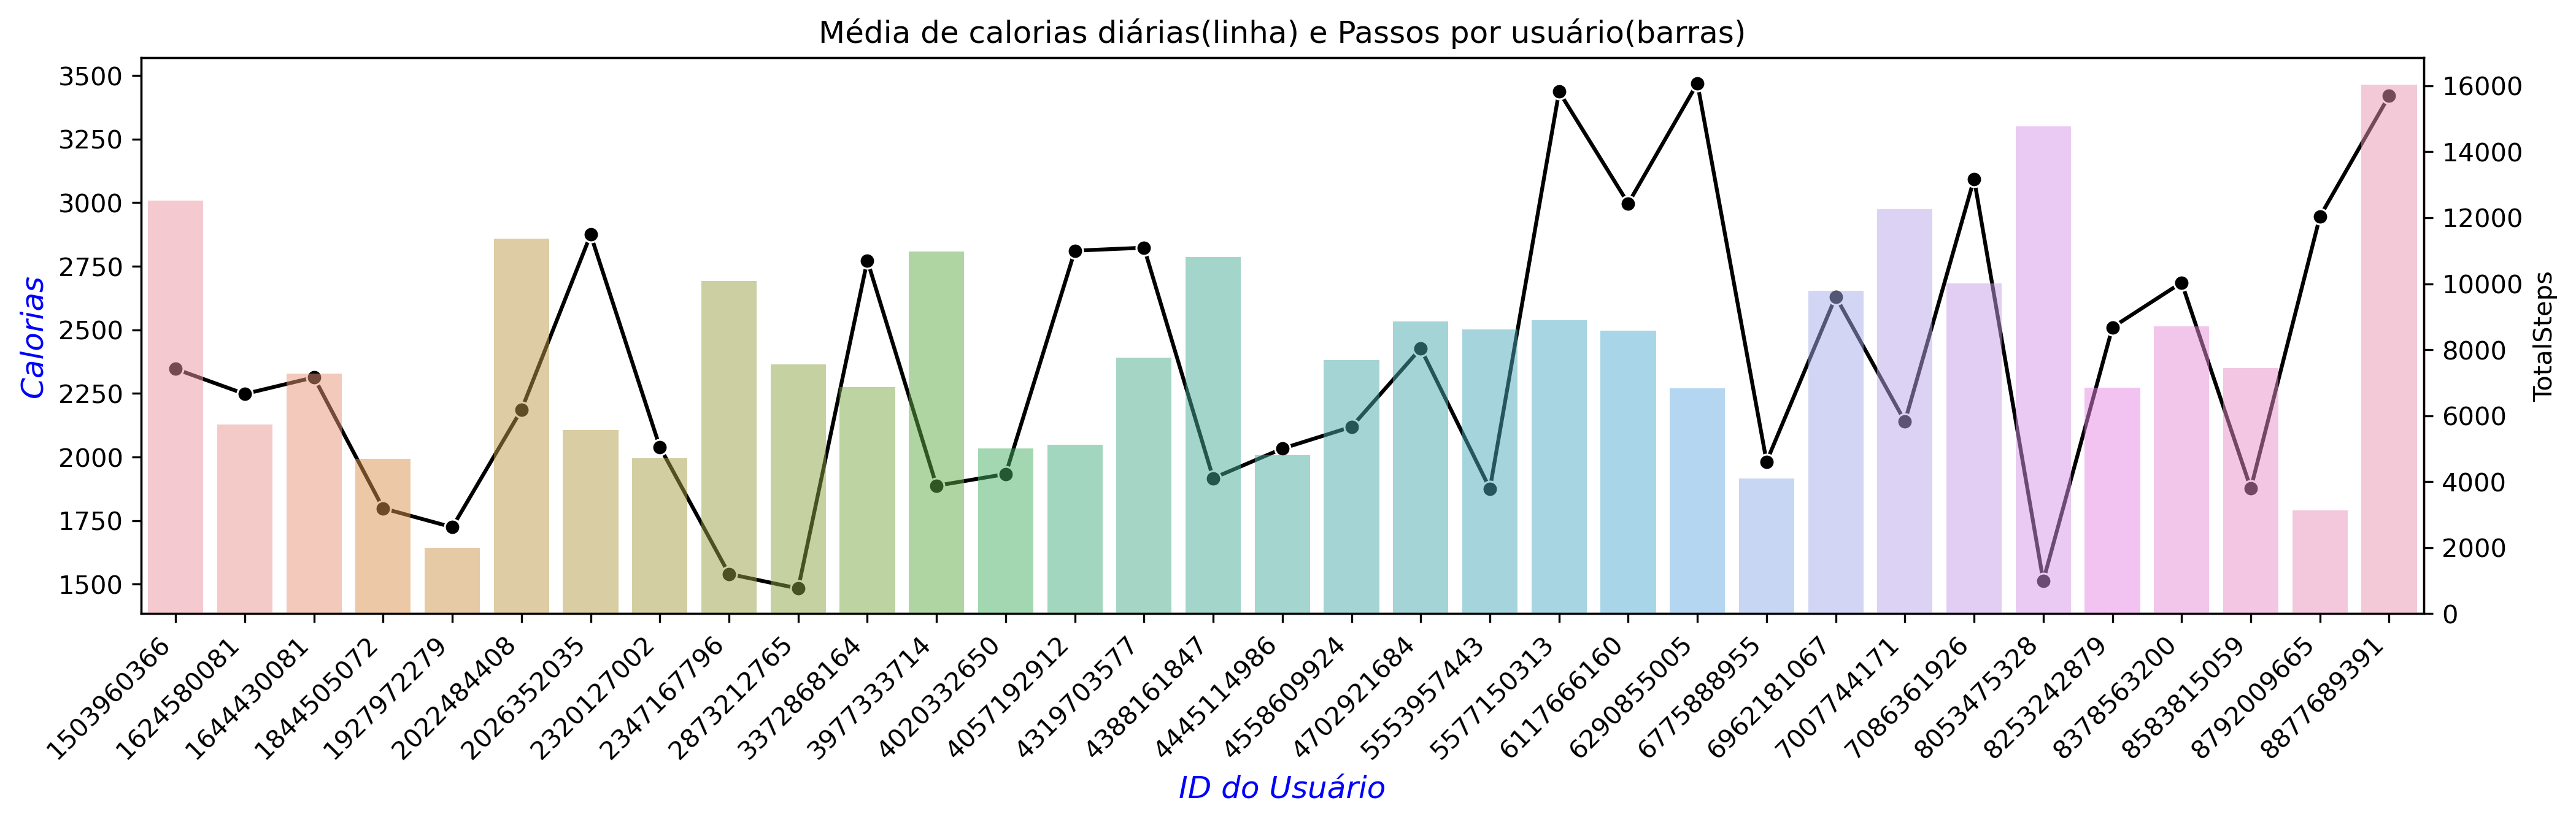

In [17]:
####  Gráfico da média de Calorias e Total de Passos por usuário  #####

agrupamento = atv_dia.groupby(['Id']).mean().reset_index()
grafico = agrupamento[['TotalSteps', 'Calories', 'Id']].sort_values(["TotalSteps"]).reset_index().drop(['index'], axis=1)
fig,ax1 = plt.subplots(figsize=(16,4))
plt.xticks(rotation=45,  horizontalalignment='right')
sns.lineplot(data = grafico['Calories'], marker='o', ax=ax1, sort= False, color = 'Black')
plt.xlabel('ID do Usuário', style = 'italic', size=12, color='Blue')
plt.ylabel('Calorias', style = 'italic', size=12, color='Blue')
ax2 = ax1.twinx()
sns.barplot(data = grafico , x = 'Id', y='TotalSteps', alpha = 0.5, ax=ax2)
plt.title('Média de calorias diárias(linha) e Passos por usuário(barras)')
plt.rcParams['figure.dpi'] = 300;

Com este gráfico conseguimos verificar que a quantidade de calorias pela quantidade de passos não possui uma relação tão visível assim. Uma das interpretações que podemos ter é que pode haver a situação que duas pessoas possuem a mesma quantidade média de passos, porém uma caminha e outra corre durante um certo período. Desta forma a corrida gasta mais calorias que a caminhada e por isso a diferença de calorias entre pessoas com quantidade de passos semelhantes.

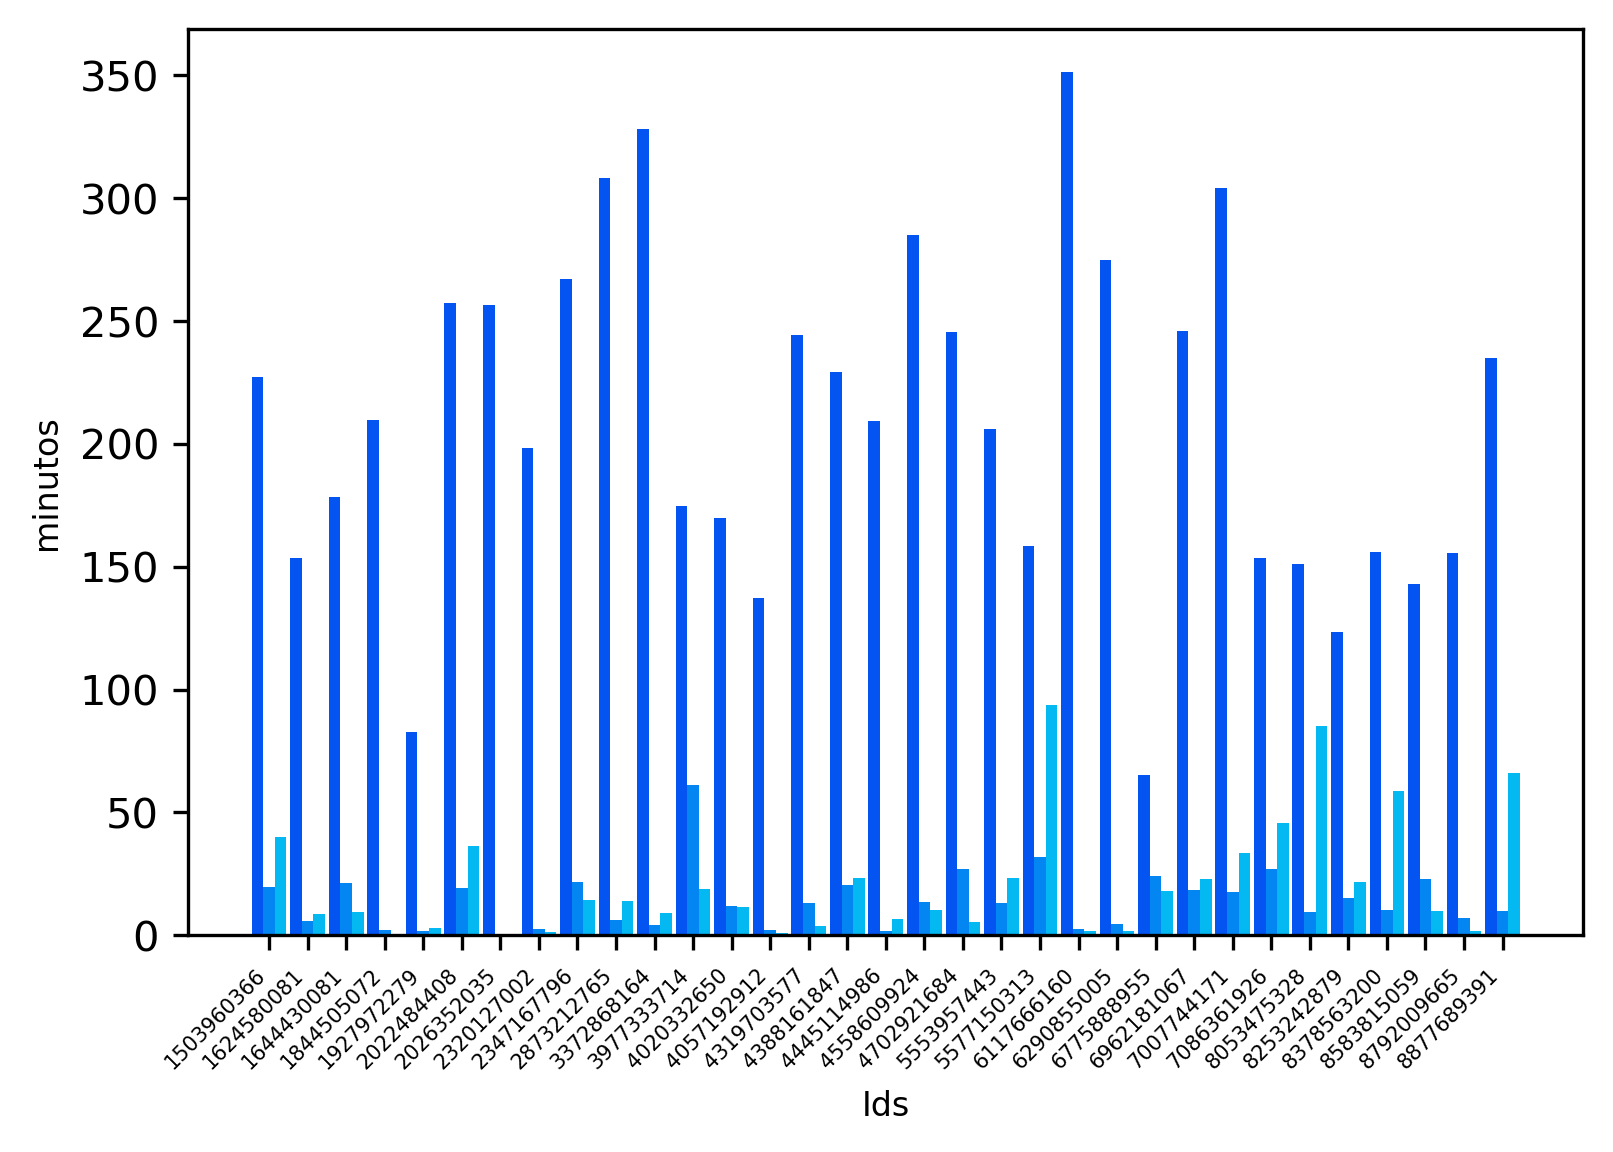

<Figure size 3000x1500 with 0 Axes>

In [25]:
x = list(agrupamento['Id'].unique())
eixox = np.arange(len(x))
w = 0.3
y1 = list(agrupamento['LightlyActiveMinutes'])
y2 = list(agrupamento['FairlyActiveMinutes'])
y3 = list(agrupamento['VeryActiveMinutes'])
barra1 = np.arange(len(x))
barra2 = [i+w for i in barra1]
barra3 = [i+w for i in barra2]

plt.bar(barra1 , y1, w , label= 'LightlyActiveMinutes', color = '#0454f2')
plt.bar(barra2, y2 , w, label= 'FairlyActiveMinutes', color = '#0486f2')
plt.bar(barra3, y3 , w, label= 'VeryActiveMinutes', color = '#04b8f2')
plt.xlabel('Ids', size = 8)
plt.ylabel('minutos', size = 8)
plt.xticks(barra1 + w ,x)
plt.xticks(rotation=45,  horizontalalignment='right', size=5)
plt.figure(figsize=(10,5))

plt.show()

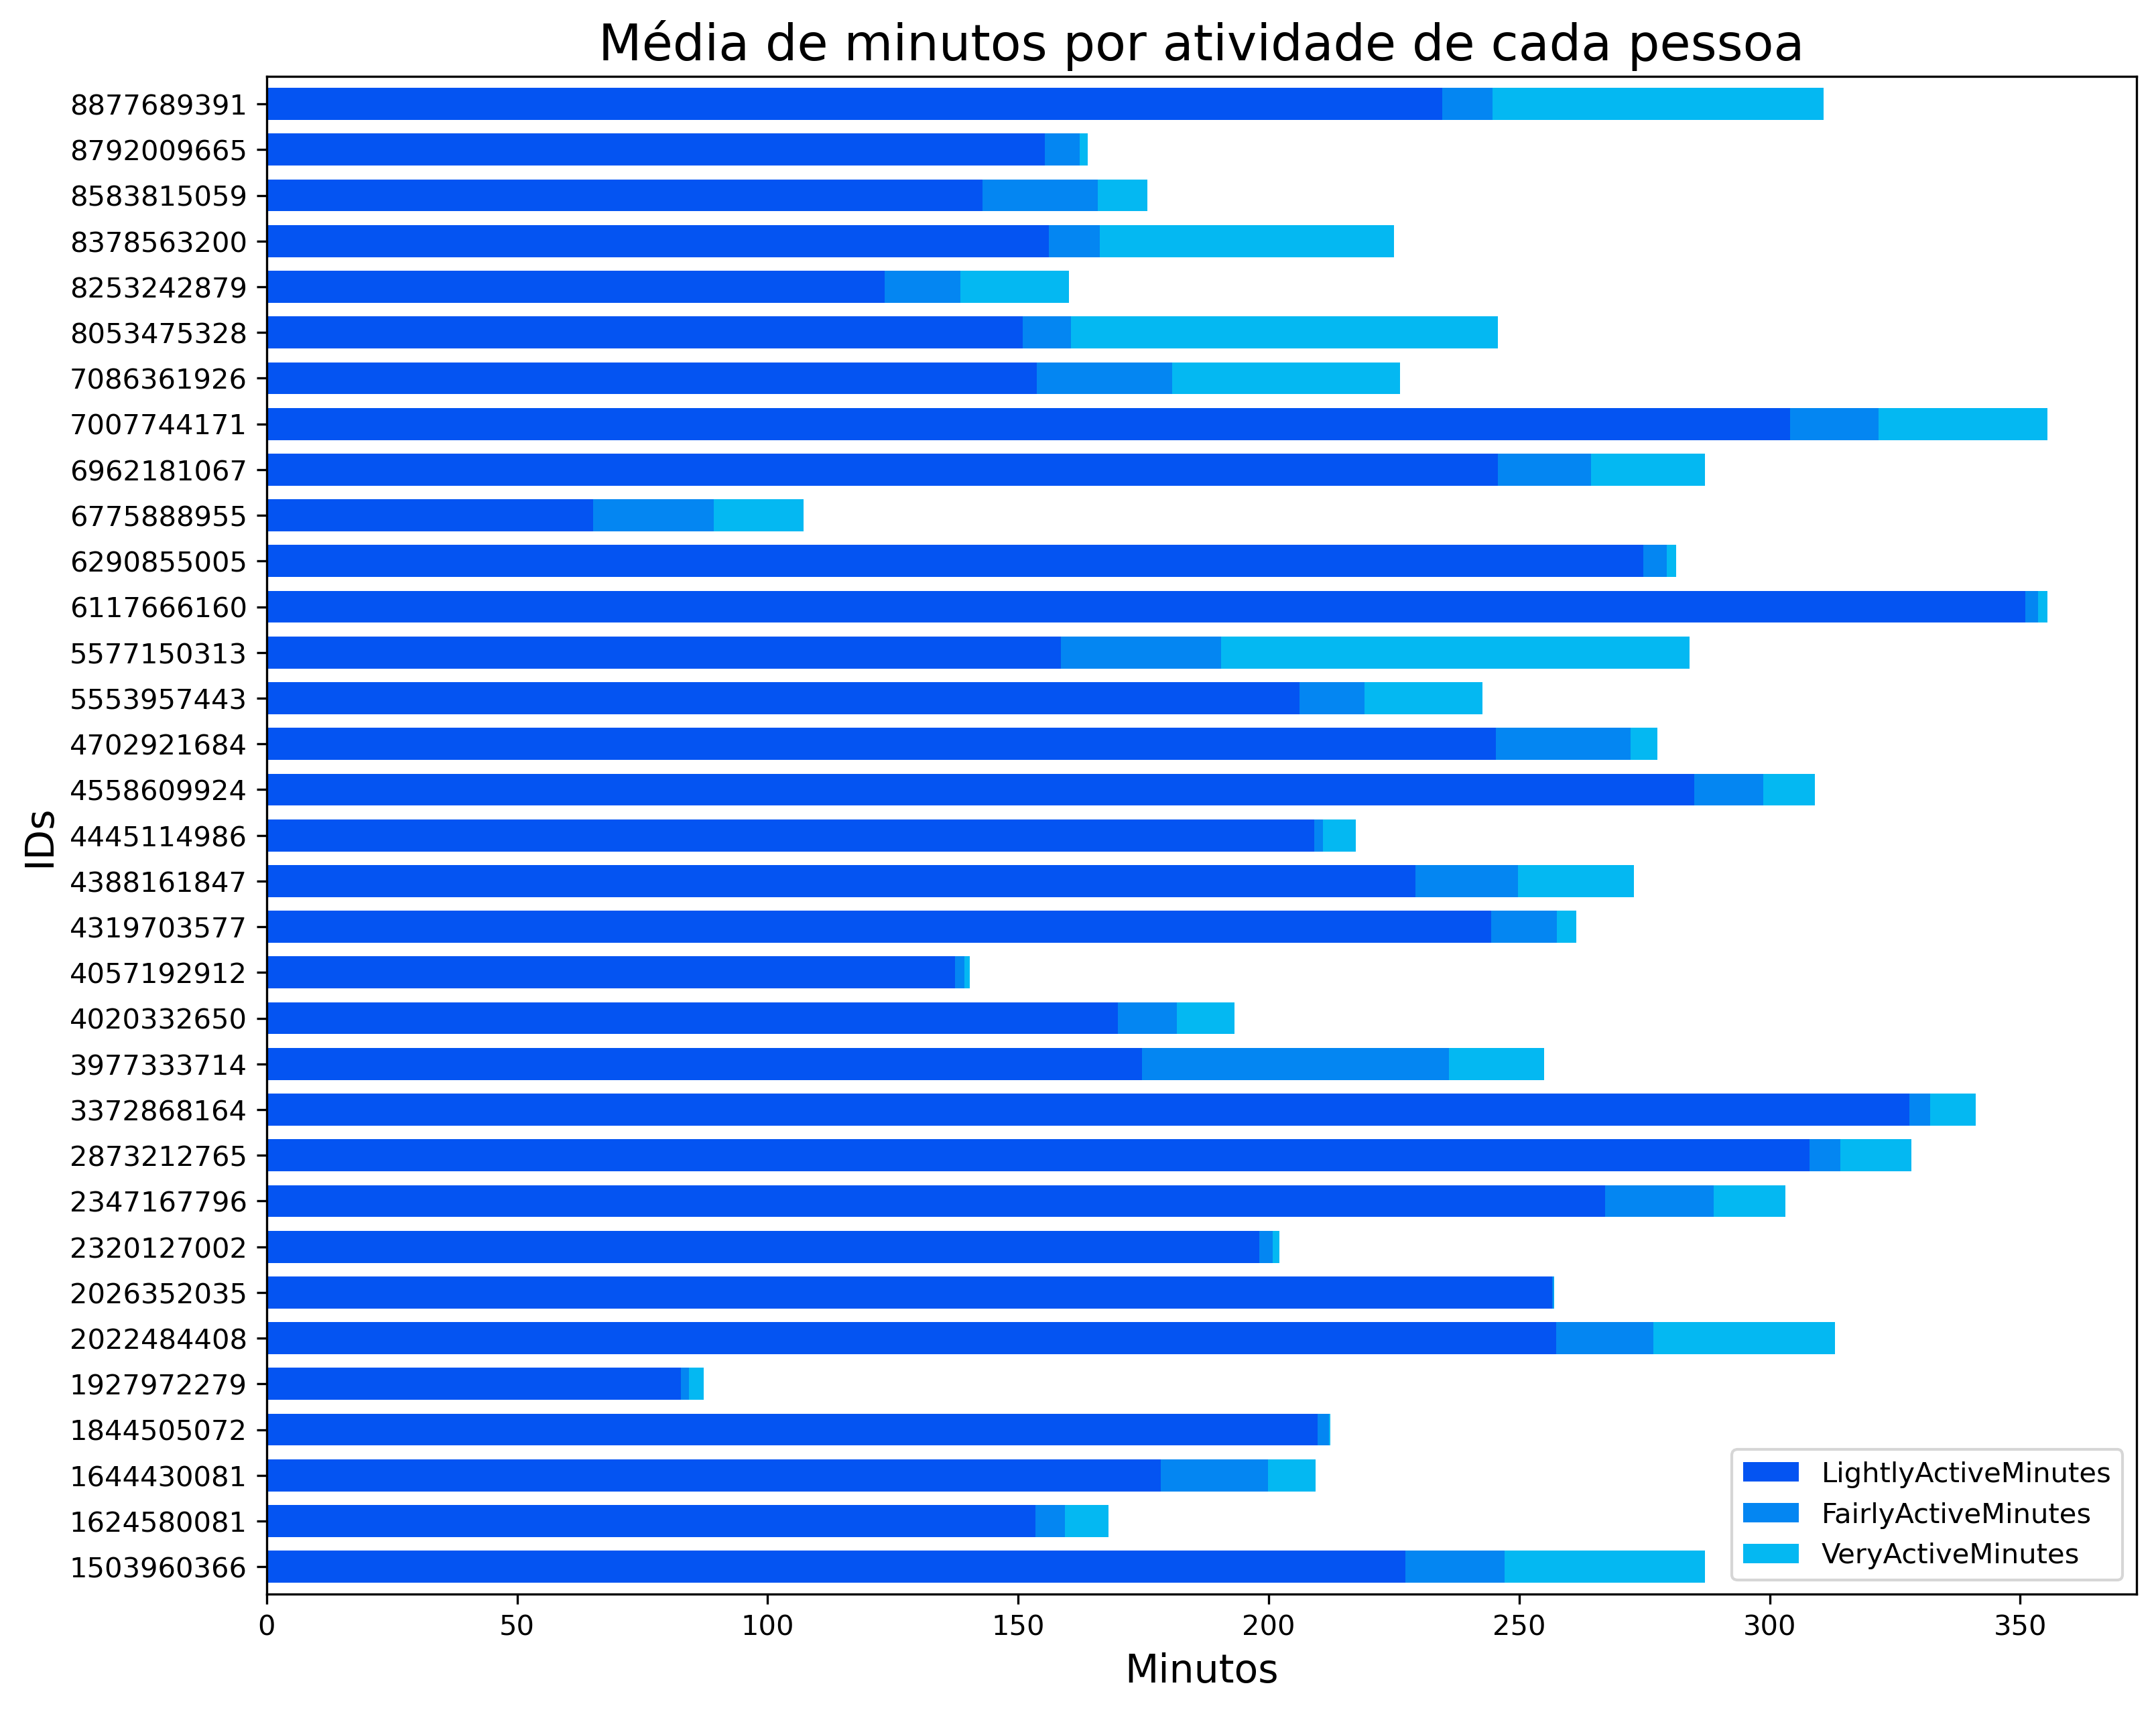

In [26]:
grafico2 = agrupamento[['Id', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']]
fig, ax = plt.subplots(figsize=(12,10))

grafico2.plot(x= 'Id',
             kind='barh',
             stacked= True,
             mark_right = True,
             color=['#0454f2' , '#0486f2', '#04b8f2'],
             width=0.7,
             ax=ax)

plt.xlabel('Minutos', size=14)
plt.ylabel('IDs', size=14)
plt.title('Média de minutos por atividade de cada pessoa', size=18)
plt.legend(loc='lower right')



Estes dois gráficos mostram a mesma informação disposta de modos diferentes. Podemos notar que a variação desta é bastante grande visto que uma parte das pessoas possuem muitos minutos ativos e outras sequer possuem tempos de alta atividade ou moderada. Para confirmarmos isso podemos ver o desvio padrão e como difere entre as classes.

In [27]:
grafico2.describe()

,Id,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
count,3.300000e+01,33.000000,33.000000,33.000000
mean,4.857201e+09,208.630007,14.250432,21.250984
std,2.433765e+09,68.825795,12.224042,24.293272
min,1.503960e+09,65.187500,0.258065,0.096774
25%,2.347168e+09,155.352941,4.583333,3.827586
50%,4.445115e+09,209.096774,13.000000,11.500000
75%,6.962181e+09,256.645161,20.354839,23.419355
max,8.877689e+09,351.043478,61.266667,93.571429


Iremos então fazer uma regressão para entendermos melhor a disposição dos dados. E um heatmap de correlações entre as variáveis do nosso dataframe.

Text(0.5, 1.0, 'Relação entre Total de Passos e Calorias')

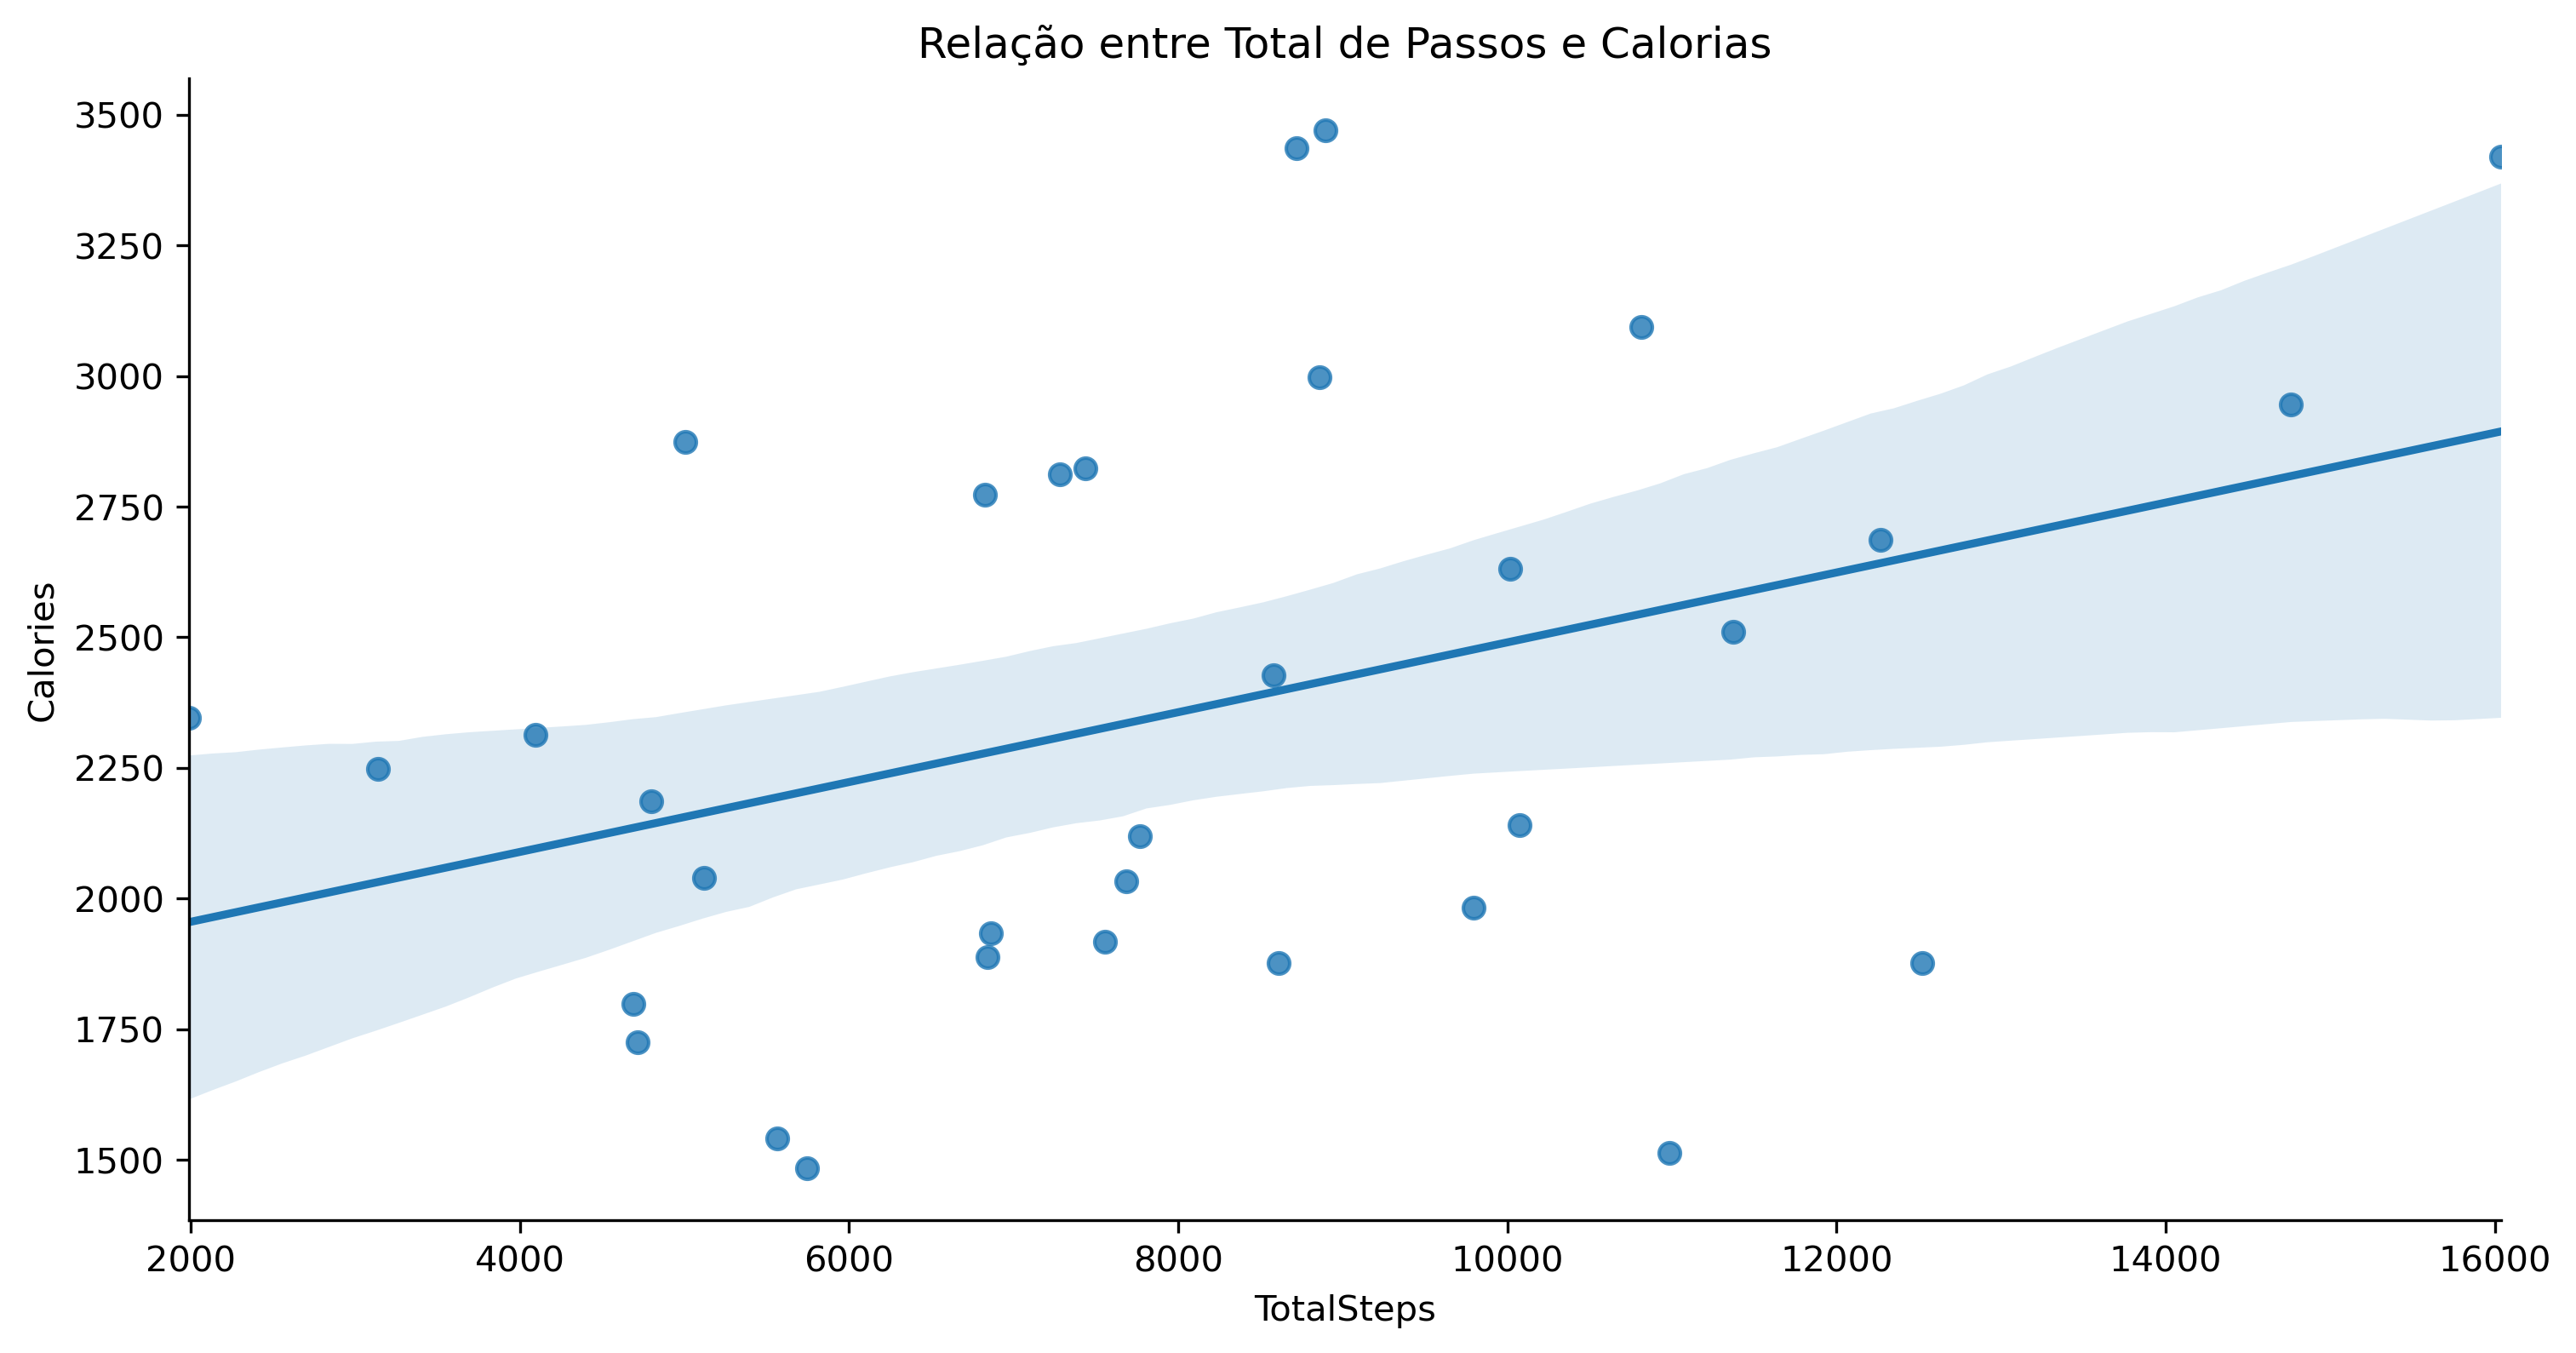

In [28]:
sns.lmplot(x='TotalSteps', y='Calories', data=agrupamento, height = 5 , aspect = 2)
plt.title('Relação entre Total de Passos e Calorias')

Text(0.5, 1.0, 'Correlação das variáveis')

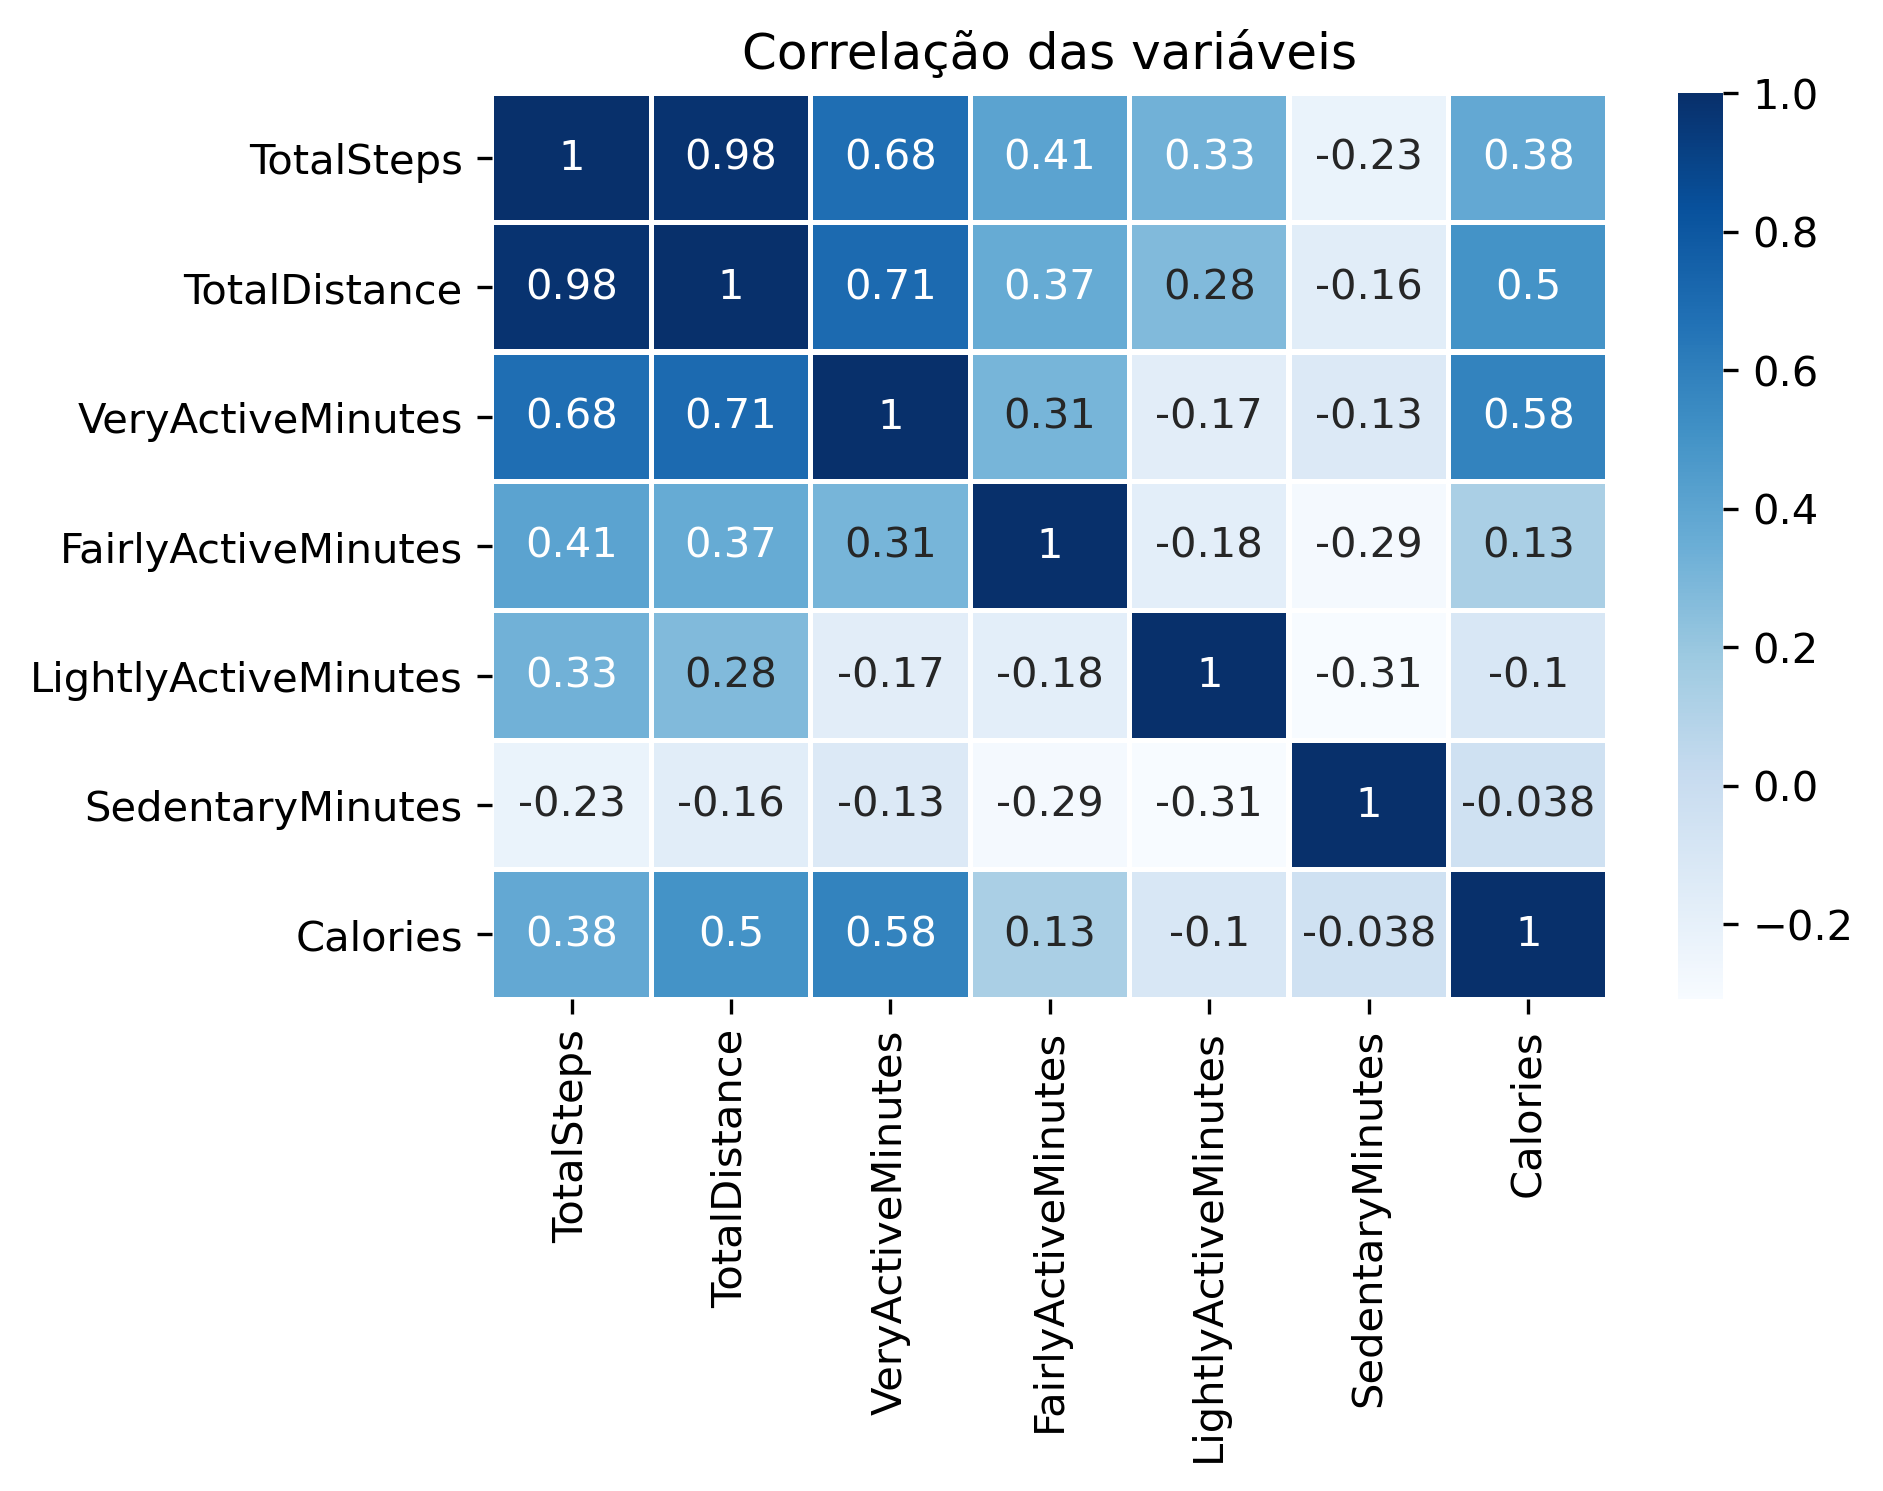

In [29]:
sns.heatmap(agrupamento[['TotalSteps', 'TotalDistance',
                         'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
                         'SedentaryMinutes','Calories']].corr(),cmap='Blues', linecolor='white', linewidths=1, annot= True)
plt.title('Correlação das variáveis')

Com o a regressão Linear entre Calorias e Distância já tinhamos uma noção que a correlação não era tão grande e podemos notar no mapa de correlação que realmente é esperado este valor. Podemos destacar do mapa de calor das correlações algumas relações. A primeira é a de Total Steps com Total Distance muito esperada chegando a quase 100% por motivos que estas variáveis muito parecidas. A segunda é a Very Active Minutes com Total Steps e Total Distance, este é bem legal para entendermos que muitos usuários que possuem uma atividade intensa tendem a ser mais ativos ou seja, possuem maiores níveis de passos. Por fim podemos falar sobre Very Active Minutes com as calorias, reforçando aquela hipotese de pessoas que correm gastam mais calorias que as pessoas que apenas caminham, quanto mais intensa a atividade mais calorias serão gastas.

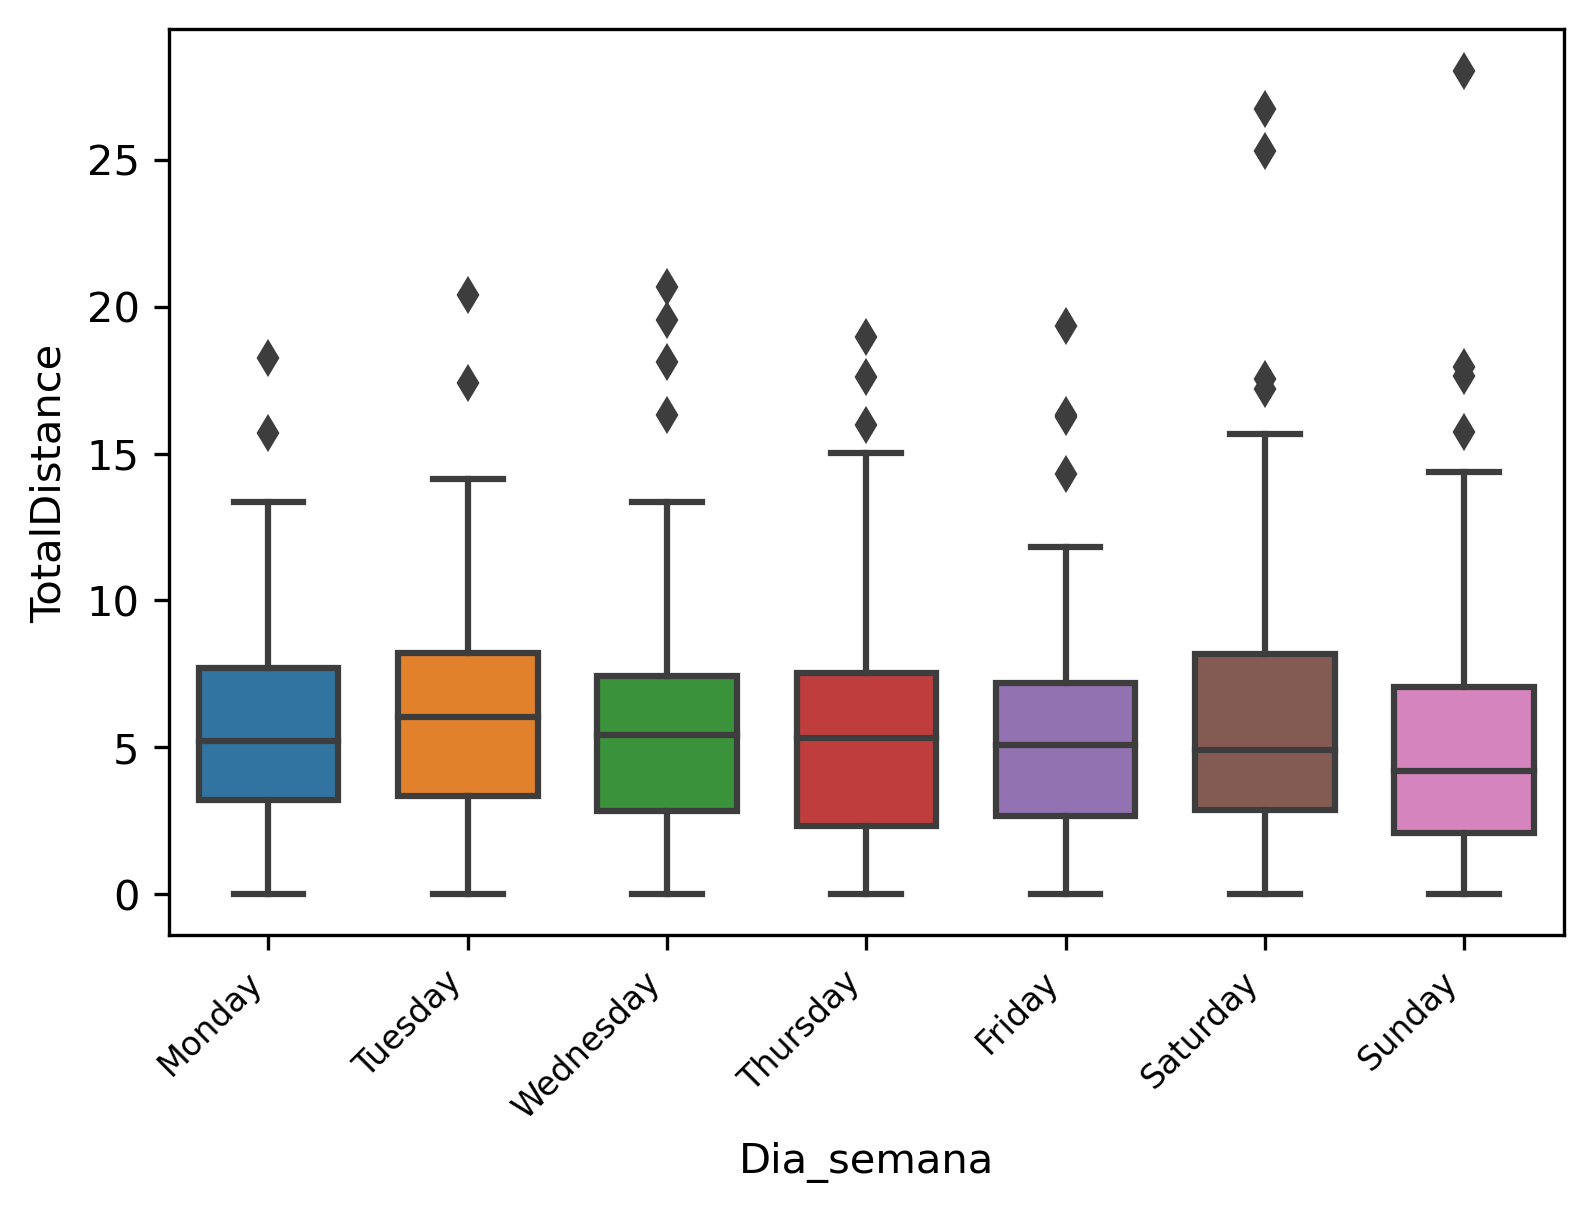

In [57]:
ax = sns.boxplot(x = "Dia_semana", y = "TotalDistance",
                 data = atividade_diaria, order=["Monday", "Tuesday", "Wednesday","Thursday", "Friday","Saturday", "Sunday"],
                width = 0.7)
plt.xticks(rotation=45,  horizontalalignment='right', size=8)
plt.show()

Na média, todos os dias de semana possuem mais ou menos a mesma quantidade de distância percorrida pelos usuários. O que varia normalmente são os limites superiores e os pontos máximos dos gráficos, especialmente para o Sábado e Domingos. Podemos entender que isto pode acontecer pois as pessoas usualmente não trabalham esses dias e assim dedicam mais tempo as atividades.

# Conclusão

Com esta preparação podemos extrair algumas informações importantes para guiar a tomada de decisão da empresa:
* A primeira é que as pessoas não costumam ativar o modo de atividade física quando vão fazer algum exercício na maioria das vezes, desta forma uma das soluções seria tentar melhorar a automatização da identificação destas tarefas pelo dispositivo.
* A segunda é encontrar uma alternativa para as pessoas que possuem passos = 0 em alguns dias para identificar o ocorrido. Seja por questões médicas e a pessoa realmente ficou de repouso. Ou então uma corrida de bicicleta que pode não estar sendo contabilizada. O mesmo pode acontecer para natação por exemplo. Uma alternativa para este problema ou é a definição pelo usuário anteriormente de quando este vai realizar estas tarefas ou mesmo hospitalização. Como também uma mensagem para o dispositivo quando detecta que não há registros de passos.
* Uma outra estratégia pode ser o incentivo dos usuários as atividades VeryActiveMinutes e FairlyActiveMinutes e dispor a quantidade de calorias que pessoas que dão poucos passos em relação a quantidade de caloria que estas gastam por conta do tipo de atividade, que pode fomentar as pessoas a ficarem mais ativas.

# Considerações

Prazer a todos, sou Arthur Maia Domingos. Estudo ciências econômicas e estou construindo minha trajetória na carreira de Data Science. Este é um projeto que realizei para o curso profissionalizante da Google de Data Analytics e irei atualizando este código com o decorrer do tempo para conseguir mais insights e utilizar bases que ainda não foram aproveitadas.